In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Different \#threads comparison

<Axes: title={'center': 'w/ syn_50k_1M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

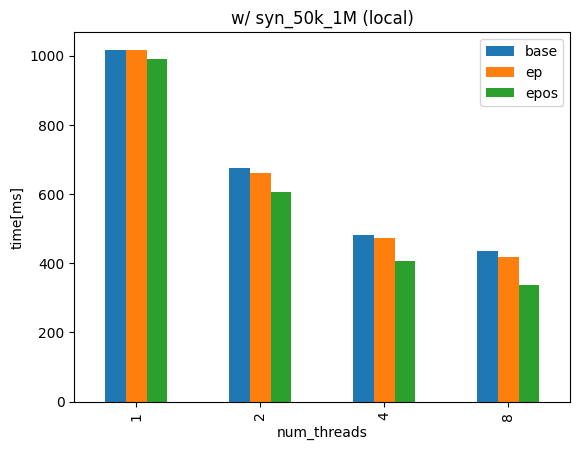

In [2]:
info = pd.read_csv("syn_50k_1M_diffThread.csv")

info\
    .drop(columns=["spark"])\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="w/ syn_50k_1M (local)")

<Axes: title={'center': 'w/ syn_1M_10M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

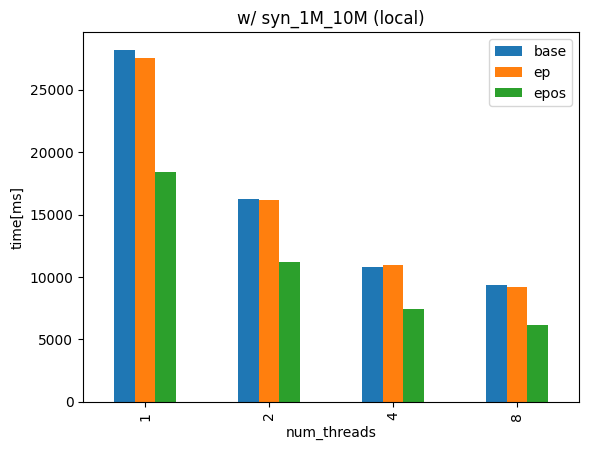

In [11]:
info = pd.read_csv("syn_1M_10M_diffThread.csv")

info\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="w/ syn_1M_10M (local)")

w/ syn_2M_10M

<Axes: title={'center': 'w/ syn_2M_10M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

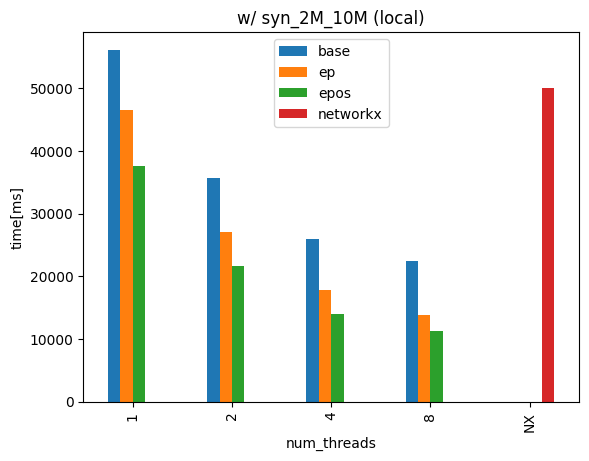

In [13]:
info = pd.read_csv("syn_2M_10M_diffThread.csv")

info\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="w/ syn_2M_10M (local)")

   num_threads      base         ep       epos
0            1  1.000000   1.000000   1.000000
1            2  1.344262   1.545805   1.516756
2            4  1.929730   3.037476   3.143257
3            8  2.144426   4.482095   4.363711
4           16  2.336005   6.043617   6.087516
5           32  2.524294   9.065425  11.767118
6           64  2.610357  10.300247  13.708181
7          128  2.607535   9.738524  10.090294


<Axes: title={'center': 'w/ human_brain (Titanic)'}, xlabel='num_threads', ylabel='speedup'>

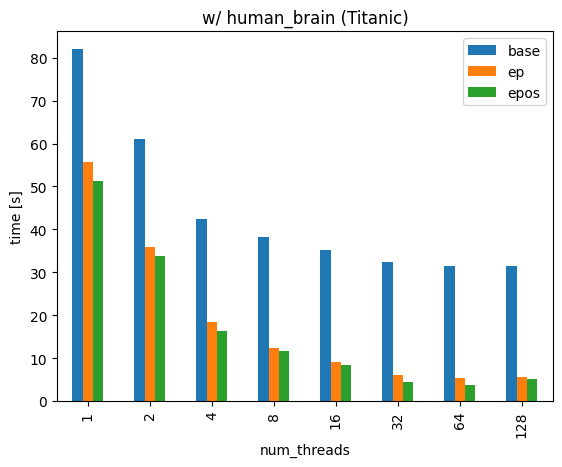

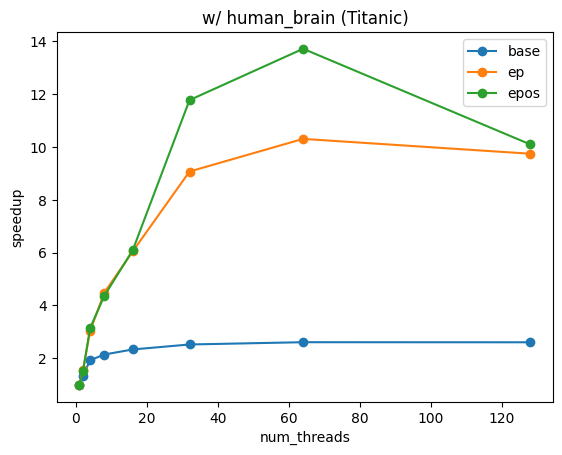

In [25]:
info = pd.read_csv("bn_titanic_diffThread.csv", comment='%')
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

info\
    .plot(x="num_threads", ylabel="time [s]", kind="bar", stacked=False, title="w/ human_brain (Titanic)")


cols = ["base", "ep", "epos"]
info[cols] = info.iloc[0][cols].div(info[cols])

print(info)

info\
    .plot(x="num_threads", ylabel="speedup", kind="line", marker='o', title="w/ human_brain (Titanic)")

   num_threads      base        ep      epos
0            1  1.000000  1.000000  1.000000
1            2  1.554408  1.626605  1.622579
2            4  2.204837  2.878523  2.419629
3            8  2.611136  3.075902  3.149255
4           16  2.902186  3.891092  3.899656
5           32  2.900726  4.243928  4.266739
6           64  2.918841  4.334937  4.256334
7          128  2.900366  4.209288  4.322606


<Axes: title={'center': 'w/ syn_5M_20M (Titanic)'}, xlabel='num_threads', ylabel='speedup'>

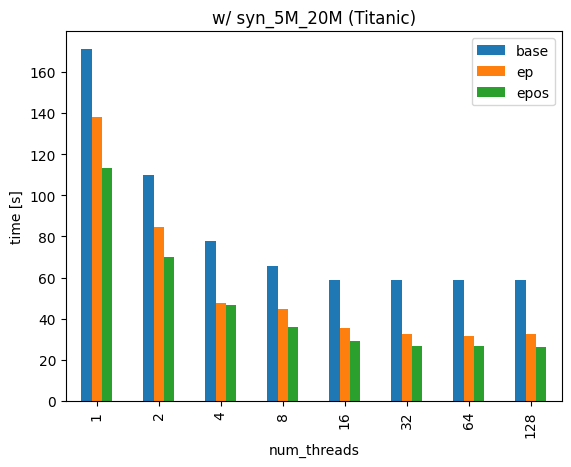

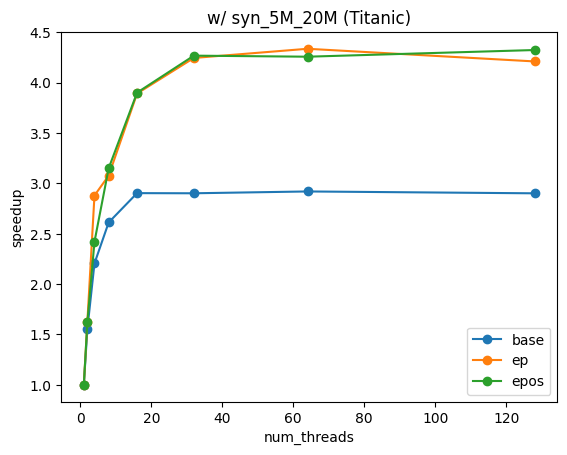

In [23]:
info = pd.read_csv("syn_5M_20M_diffThread.csv", comment='%')
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

info\
    .plot(x="num_threads", ylabel="time [s]", kind="bar", title="w/ syn_5M_20M (Titanic)")


cols = ["base", "ep", "epos"]
info[cols] = info.iloc[0][cols].div(info[cols])

print(info)

info\
    .plot(x="num_threads", ylabel="speedup", kind="line", marker='o', title="w/ syn_5M_20M (Titanic)")

# New style

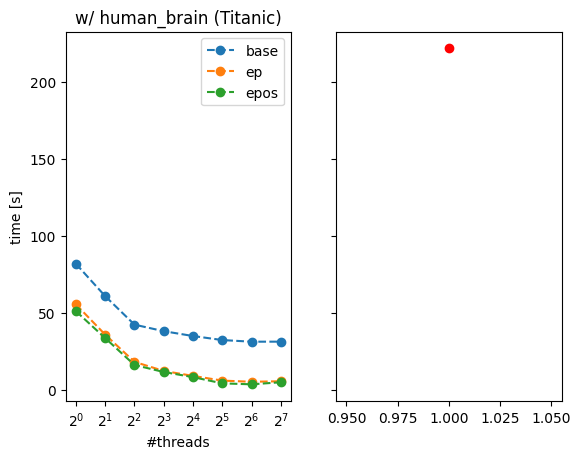

In [28]:
info = pd.read_csv("bn_titanic_diffThread.csv", comment='%')
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

fig, axs = plt.subplots(nrows= 1, ncols=2, sharey=True)  # 2 rows, 1 column of plots

axs[0].plot(info["num_threads"], info["base"], marker="o", linestyle='--', label="base")
axs[0].plot(info["num_threads"], info["ep"], marker="o", linestyle='--', label="ep")
axs[0].plot(info["num_threads"], info["epos"], marker="o", linestyle='--', label="epos")

axs[0].set_xscale("log", base=2)
axs[0].set_xticks(info['num_threads'])
axs[0].set_xlabel('#threads')
axs[0].set_ylabel('time [s]')
axs[0].set_title('w/ human_brain (Titanic)')

axs[0].legend()


axs[1].plot(1, (221935.6243 / 1000), marker="o", color="r", label="NX")

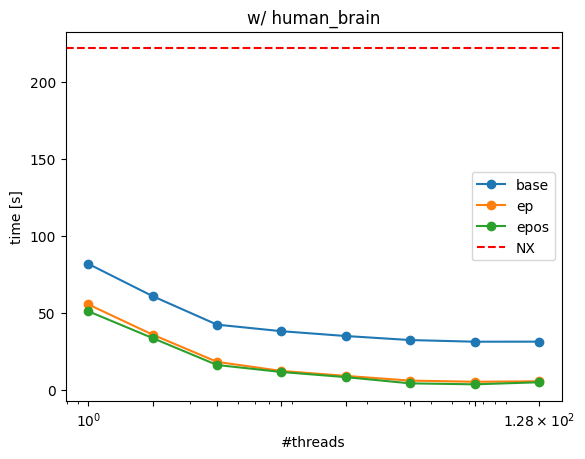

In [8]:
single_core_time = 221935.6243 / 1000

info = pd.read_csv("bn_titanic_diffThread.csv", comment='%')
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

# Plotting the parallel algorithm's performance
plt.plot(info['num_threads'], info["base"], label="base", marker='o')
plt.plot(info['num_threads'], info["ep"], label="ep", marker='o')
plt.plot(info['num_threads'], info["epos"], label="epos", marker='o')


# Plotting the single-core algorithm (as a constant line)
plt.axhline(y=single_core_time, color='r', linestyle='--', label="NX")

#plt.xscale('log')
#plt.xticks(info["num_threads"])

# Adding labels and title
plt.xlabel("#threads")
plt.ylabel("time [s]")
plt.title("w/ human_brain")
plt.legend()

# Show the plot
plt.show()
